In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path=".\spam mail.csv"
df=pd.read_csv(path)

In [4]:
df.head()

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Congratulations! You've won a $500 gift card. ...
3,spam,Your account has been locked. Verify your deta...
4,spam,Get a brand new iPhone 14 for free! Only a few...


In [5]:
df.columns

Index(['Category', 'Masseges'], dtype='object')

In [6]:
df.shape

(5602, 2)

In [7]:
df['Category']=df['Category'].map({'ham':0,'spam':1})

In [8]:
df.head()

,Category,Masseges
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Congratulations! You've won a $500 gift card. ...
3,1,Your account has been locked. Verify your deta...
4,1,Get a brand new iPhone 14 for free! Only a few...


In [9]:
df.isna().sum()

Category    0
Masseges    0
dtype: int64

In [10]:
import re
def clean_text(text):
    text=text.lower()
    #text=re.sub(r'\d+',' ',text)
    text=re.sub(r'[^\w\s]',' ',text)
    text=re.sub(r'\s+',' ',text)
    return text
df['Masseges']=df['Masseges'].apply(clean_text)
df.head()

,Category,Masseges
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,congratulations you ve won a 500 gift card cli...
3,1,your account has been locked verify your detai...
4,1,get a brand new iphone 14 for free only a few ...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer=TfidfVectorizer(max_features=3000,ngram_range=(1,2))
X=Vectorizer.fit_transform(df['Masseges'])
y=df['Category']

In [12]:
import joblib
joblib.dump(Vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [13]:
y.value_counts()

Category
0    4825
1     777
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [16]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE :", Counter(y_train_resampled))

Before SMOTE: Counter({0: 3851, 1: 630})
After SMOTE : Counter({1: 3851, 0: 3851})


##  1. Class Distribution Bar Plot (Spam vs Ham)

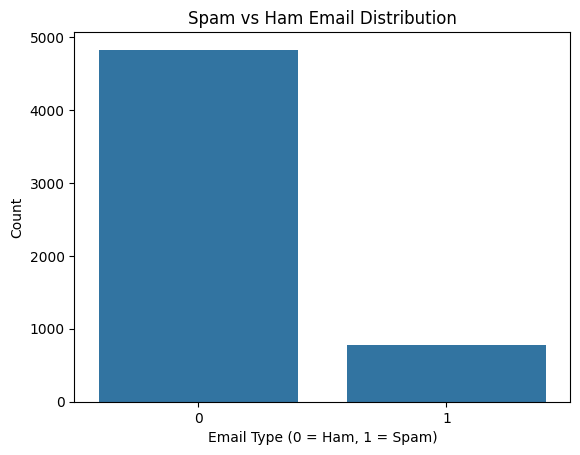

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distribution
sns.countplot(x='Category', data=df)
plt.title('Spam vs Ham Email Distribution')
plt.xlabel('Email Type (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()

##  2. Heatmap of Correlation (Optional - Only useful if you have numeric features)

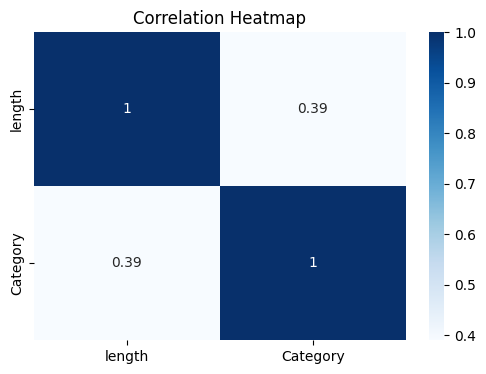

In [24]:
# Add a new feature (example: message length)
df['length'] = df['Masseges'].apply(len)

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['length', 'Category']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


## Model Building

In [25]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

In [26]:
import joblib
joblib.dump(svm_model, 'spam_classifier_svm_model.pkl')

['spam_classifier_svm_model.pkl']

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=svm_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.4f}")


Accuracy: 96.5210


In [28]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       974
           1       0.83      0.92      0.87       147

    accuracy                           0.97      1121
   macro avg       0.91      0.95      0.93      1121
weighted avg       0.97      0.97      0.97      1121



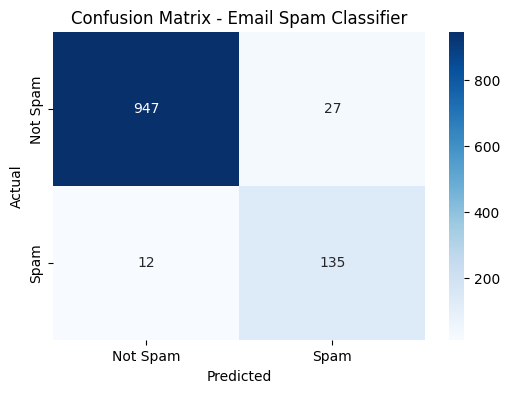

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
labels = ['Not Spam', 'Spam']  

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Email Spam Classifier')
plt.show()


## Random Forest MOdel

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [31]:
import joblib
joblib.dump(rf_model, 'spam_classifier_rf_model.pkl')

['spam_classifier_rf_model.pkl']

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=rf_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.4f}")


Accuracy: 98.3943


In [33]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       974
           1       0.99      0.88      0.94       147

    accuracy                           0.98      1121
   macro avg       0.99      0.94      0.96      1121
weighted avg       0.98      0.98      0.98      1121



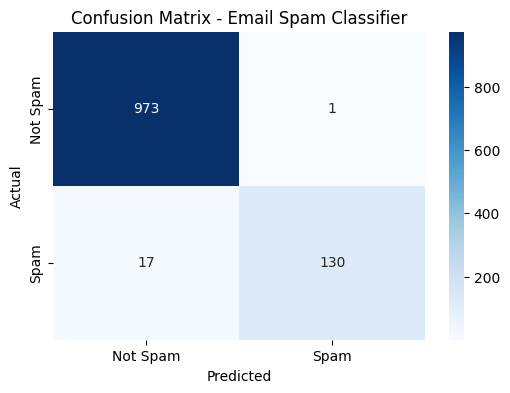

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)
labels = ['Not Spam', 'Spam'] 

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Email Spam Classifier')
plt.show()
